In [5]:
import pandas as pd

data = pd.read_csv('./supermarket_sales.csv')
data.head()

,Order_ID,Order_Date,Region,Country,Sales_Rep,Team,Customer_ID,Customer_Segment,Product_Category,Product_Name,Stage,Units_Sold,Revenue,Target,Deal_Size
0,4971,2021-01-01,North,USA,David Lee,Team C,C3971,Corporate,Furniture,Office Chair,Won,6,1662,1447,1665
1,2347,2021-01-02,South,Brazil,Alice Johnson,Team B,C1347,SME,Appliances,Microwave Max,Opportunity,2,464,875,928
2,2588,2021-01-02,South,Brazil,Maria Garcia,Team C,C1588,Retail,Appliances,Refrigerator,Opportunity,5,132,277,264
3,5092,2021-01-02,East,China,Priya Sharma,Team B,C4092,Retail,Appliances,Microwave Max,Opportunity,5,610,1080,1220
4,1182,2021-01-02,North,Canada,David Lee,Team A,C0182,Retail,Electronics,Smartphone Z,Lost,0,0,854,0


identifikasi informasi dataset (pemeriksaan tipe data)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_ID          5000 non-null   int64 
 1   Order_Date        5000 non-null   object
 2   Region            5000 non-null   object
 3   Country           5000 non-null   object
 4   Sales_Rep         5000 non-null   object
 5   Team              5000 non-null   object
 6   Customer_ID       5000 non-null   object
 7   Customer_Segment  5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Product_Name      5000 non-null   object
 10  Stage             5000 non-null   object
 11  Units_Sold        5000 non-null   int64 
 12  Revenue           5000 non-null   int64 
 13  Target            5000 non-null   int64 
 14  Deal_Size         5000 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 586.1+ KB


menampilkan statistik deskriptif dari dataset

In [7]:
data.describe(include="all")

,Order_ID,Order_Date,Region,Country,Sales_Rep,Team,Customer_ID,Customer_Segment,Product_Category,Product_Name,Stage,Units_Sold,Revenue,Target,Deal_Size
count,5000.000000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000
unique,NaN,1419,4,8,6,3,5000,3,3,8,3,NaN,NaN,NaN,NaN
top,NaN,2022-04-13,North,Canada,Alice Johnson,Team C,C3221,Corporate,Appliances,Standing Desk,Lost,NaN,NaN,NaN,NaN
freq,NaN,10,1323,668,861,1758,1,1675,1709,860,1707,NaN,NaN,NaN,NaN
mean,3500.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.818400,502.390000,994.572000,639.007800
std,1443.520003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.922453,555.072392,556.665335,598.863616
min,1001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-193.000000,0.000000
25%,2250.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,567.000000,0.000000
50%,3500.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,347.500000,914.000000,556.000000
75%,4750.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,728.000000,1427.000000,1129.000000


statistik deskriptif untuk variabel numerik

In [8]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("Statistik Deskriptif:")
print(data[numeric_columns].describe())

Statistik Deskriptif:
          Order_ID   Units_Sold      Revenue       Target    Deal_Size
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean   3500.500000     2.818400   502.390000   994.572000   639.007800
std    1443.520003     2.922453   555.072392   556.665335   598.863616
min    1001.000000     0.000000     0.000000  -193.000000     0.000000
25%    2250.750000     0.000000     0.000000   567.000000     0.000000
50%    3500.500000     2.000000   347.500000   914.000000   556.000000
75%    4750.250000     5.000000   728.000000  1427.000000  1129.000000
max    6000.000000    10.000000  1999.000000  2461.000000  1999.000000


memeriksa transaksi dengan nilai 0 dan negatif

In [9]:
zero_revenue = data[data['Revenue'] == 0]
negative_target = data[data['Target'] < 0]
zero_units = data[data['Units_Sold'] == 0]

print(f"Transaksi dengan Revenue 0: {len(zero_revenue)}")
print(f"Transaksi dengan Target negatif: {len(negative_target)}")
print(f"Transaksi dengan Units Sold 0: {len(zero_units)}")

Transaksi dengan Revenue 0: 1707
Transaksi dengan Target negatif: 61
Transaksi dengan Units Sold 0: 1707


Investigasi temuan data quality

In [11]:
print(" **INVESTIGASI TEMUAN:**")
print("=" * 50)

# 1. Investigasi TARGET NEGATIF (issue baru!)
print("🚨 TARGET NEGATIF - Perlu Investigasi:")
negative_target_details = data[data['Target'] < 0]
print(negative_target_details[['Order_ID', 'Stage', 'Target', 'Revenue', 'Units_Sold']])

# 2. Breakdown Revenue 0 by Stage
print(f"\n REVENUE 0 BREAKDOWN:")
revenue_zero_breakdown = data[data['Revenue'] == 0]['Stage'].value_counts()
print(revenue_zero_breakdown)

# 3. Check Deal_Size 0 
print(f"\n DEAL_SIZE 0 ANALYSIS:")
deal_size_zero = data[data['Deal_Size'] == 0]
print(f"Deal_Size 0 count: {len(deal_size_zero)}")
if len(deal_size_zero) > 0:
    print(deal_size_zero[['Order_ID', 'Stage', 'Revenue', 'Deal_Size']].head())

 **INVESTIGASI TEMUAN:**
🚨 TARGET NEGATIF - Perlu Investigasi:
      Order_ID        Stage  Target  Revenue  Units_Sold
23        2957  Opportunity     -78      179           2
138       2291          Won     -75      222           6
389       2154          Won     -49      216           4
439       3478  Opportunity     -76      150           2
457       5005  Opportunity     -55      227           2
...        ...          ...     ...      ...         ...
4588      2113  Opportunity     -93      180           2
4687      4246  Opportunity     -15      261           1
4757      3228  Opportunity     -12      100           2
4784      4642  Opportunity     -55      124           1
4973      1385  Opportunity    -135      136           2

[61 rows x 5 columns]

 REVENUE 0 BREAKDOWN:
Stage
Lost    1707
Name: count, dtype: int64

 DEAL_SIZE 0 ANALYSIS:
Deal_Size 0 count: 1707
    Order_ID Stage  Revenue  Deal_Size
4       1182  Lost        0          0
5       4396  Lost        0         

Melakukan proses data cleaning

In [12]:
df_clean = data.copy()

# 1. Fix Negative Target
negative_target_fixed = len(df_clean[df_clean['Target'] < 0])
df_clean['Target'] = df_clean['Target'].apply(lambda x: max(0, x))
print(f"✅ Fixed {negative_target_fixed} negative Target values")

# 2. Convert Date
df_clean['Order_Date'] = pd.to_datetime(df_clean['Order_Date'])
print(f"✅ Converted Order_Date to datetime")

# 3. Quick validation
print(f"\n🎯 CLEANING VALIDATION:")
print(f"   - Records: {len(df_clean):,} (no data loss)")
print(f"   - Negative Target after cleaning: {(df_clean['Target'] < 0).sum()}")
print(f"   - Date type: {df_clean['Order_Date'].dtype}")

✅ Fixed 61 negative Target values
✅ Converted Order_Date to datetime

🎯 CLEANING VALIDATION:
   - Records: 5,000 (no data loss)
   - Negative Target after cleaning: 0
   - Date type: datetime64[ns]


visualisasi

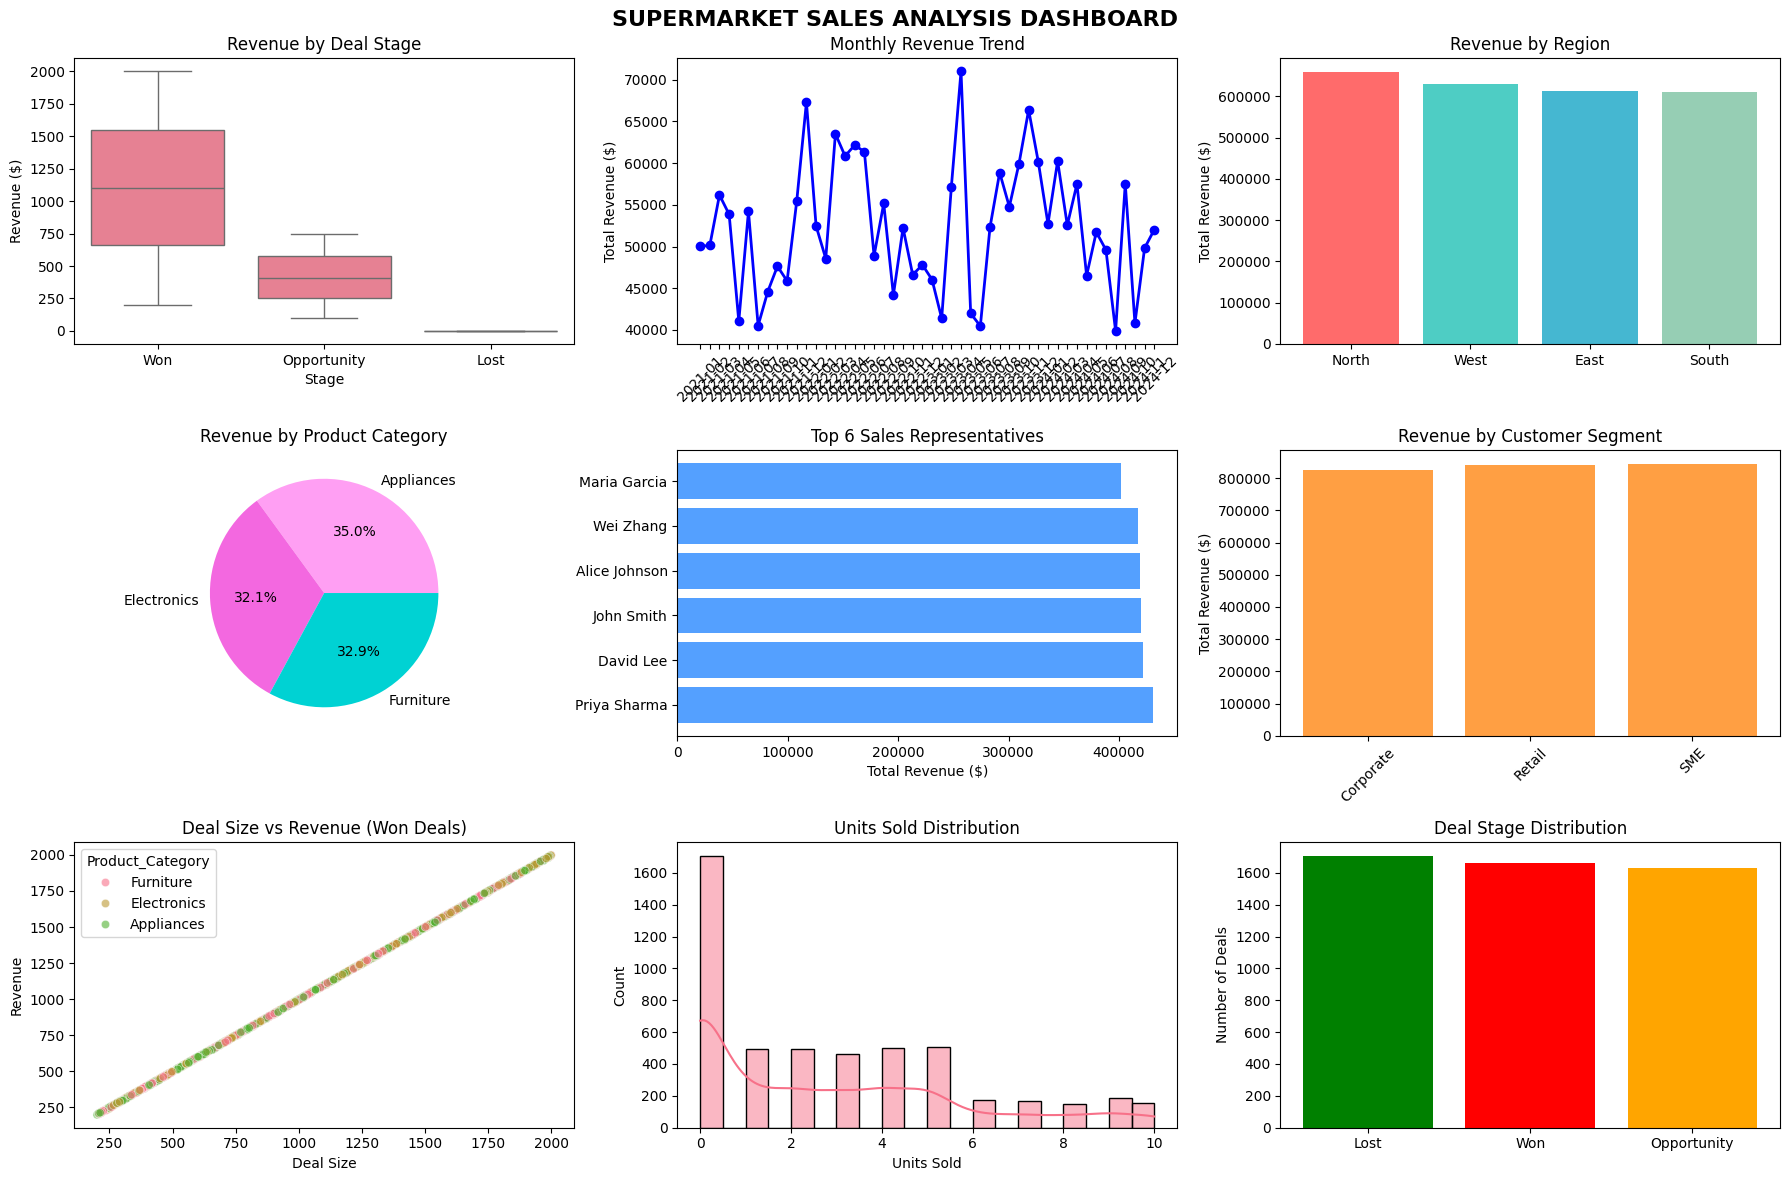

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('default')
sns.set_palette("husl")

# Create comprehensive dashboard
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('SUPERMARKET SALES ANALYSIS DASHBOARD', fontsize=16, fontweight='bold')

# 1. Revenue Distribution by Stage
sns.boxplot(data=df_clean, x='Stage', y='Revenue', ax=axes[0,0])
axes[0,0].set_title('Revenue by Deal Stage')
axes[0,0].set_ylabel('Revenue ($)')

# 2. Monthly Revenue Trend
monthly_revenue = df_clean.groupby(df_clean['Order_Date'].dt.to_period('M'))['Revenue'].sum()
axes[0,1].plot(monthly_revenue.index.astype(str), monthly_revenue.values, marker='o', linewidth=2, color='blue')
axes[0,1].set_title('Monthly Revenue Trend')
axes[0,1].set_ylabel('Total Revenue ($)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Regional Performance
region_revenue = df_clean.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
axes[0,2].bar(region_revenue.index, region_revenue.values, color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4'])
axes[0,2].set_title('Revenue by Region')
axes[0,2].set_ylabel('Total Revenue ($)')

# 4. Product Category Analysis
product_revenue = df_clean.groupby('Product_Category')['Revenue'].sum()
axes[1,0].pie(product_revenue.values, labels=product_revenue.index, autopct='%1.1f%%', 
             colors=['#ff9ff3', '#f368e0', '#00d2d3'])
axes[1,0].set_title('Revenue by Product Category')

# 5. Sales Team Performance (Top 6)
top_sales = df_clean.groupby('Sales_Rep')['Revenue'].sum().nlargest(6)
axes[1,1].barh(top_sales.index, top_sales.values, color='#54a0ff')
axes[1,1].set_title('Top 6 Sales Representatives')
axes[1,1].set_xlabel('Total Revenue ($)')

# 6. Customer Segment Analysis
segment_revenue = df_clean.groupby('Customer_Segment')['Revenue'].sum()
axes[1,2].bar(segment_revenue.index, segment_revenue.values, color='#ff9f43')
axes[1,2].set_title('Revenue by Customer Segment')
axes[1,2].set_ylabel('Total Revenue ($)')
axes[1,2].tick_params(axis='x', rotation=45)

# 7. Deal Size vs Revenue
sns.scatterplot(data=df_clean[df_clean['Stage'] == 'Won'], x='Deal_Size', y='Revenue', 
                hue='Product_Category', ax=axes[2,0], alpha=0.6)
axes[2,0].set_title('Deal Size vs Revenue (Won Deals)')
axes[2,0].set_xlabel('Deal Size')
axes[2,0].set_ylabel('Revenue')

# 8. Units Sold Distribution
sns.histplot(df_clean['Units_Sold'], bins=20, kde=True, ax=axes[2,1])
axes[2,1].set_title('Units Sold Distribution')
axes[2,1].set_xlabel('Units Sold')

# 9. Stage Distribution
stage_counts = df_clean['Stage'].value_counts()
axes[2,2].bar(stage_counts.index, stage_counts.values, color=['green', 'red', 'orange'])
axes[2,2].set_title('Deal Stage Distribution')
axes[2,2].set_ylabel('Number of Deals')

plt.tight_layout()
plt.show()

Analisis korelasi

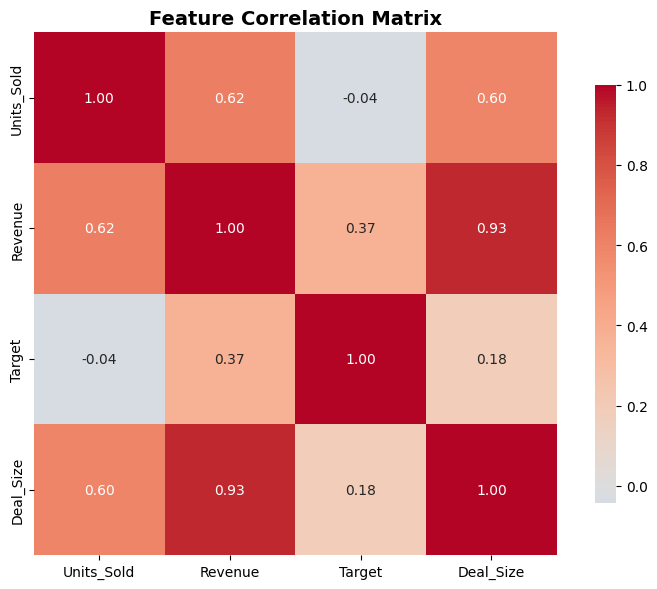

TOP CORRELATIONS WITH REVENUE:
   Deal_Size: 0.928
   Units_Sold: 0.625
   Target: 0.371


In [15]:
# Correlation matrix
numeric_cols = ['Units_Sold', 'Revenue', 'Target', 'Deal_Size']
correlation_data = df_clean[numeric_cols]

plt.figure(figsize=(8, 6))
correlation_matrix = correlation_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with Revenue
print("TOP CORRELATIONS WITH REVENUE:")
revenue_correlations = correlation_matrix['Revenue'].sort_values(ascending=False)
for feature, corr in revenue_correlations.items():
    if feature != 'Revenue':
        print(f"   {feature}: {corr:.3f}")

Insight bisnis

In [18]:
# Key Business Insights
print("KEY BUSINESS INSIGHTS:")

# 1. Performance Metrics
total_revenue = df_clean['Revenue'].sum()
conversion_rate = (df_clean['Stage'] == 'Won').sum() / len(df_clean) * 100
avg_deal_size = df_clean[df_clean['Stage'] == 'Won']['Revenue'].mean()

print(f"1. Overall Performance:")
print(f"   • Total Revenue: ${total_revenue:,.2f}")
print(f"   • Conversion Rate: {conversion_rate:.1f}%")
print(f"   • Average Won Deal Size: ${avg_deal_size:,.2f}")

# 2. Top Performers
top_region = df_clean.groupby('Region')['Revenue'].sum().idxmax()
top_product = df_clean.groupby('Product_Category')['Revenue'].sum().idxmax()
top_sales_rep = df_clean.groupby('Sales_Rep')['Revenue'].sum().idxmax()

print(f"\n2. Top Performers:")
print(f"   • Best Region: {top_region}")
print(f"   • Best Product Category: {top_product}")
print(f"   • Best Sales Rep: {top_sales_rep}")

# 3. Opportunities
opportunity_pipeline = df_clean[df_clean['Stage'] == 'Opportunity']['Revenue'].sum()
lost_potential = df_clean[df_clean['Stage'] == 'Lost']['Target'].sum()

print(f"\n3. Growth Opportunities:")
print(f"   • Opportunity Pipeline: ${opportunity_pipeline:,.2f}")
print(f"   • Lost Deal Potential: ${lost_potential:,.2f}")

# Export cleaned data
df_clean.to_csv('supermarket_sales_cleaned_final.csv', index=False)

print(f"\nFINAL SUMMARY:")
print(f"   - Data cleaned and validated")
print(f"   - 9 comprehensive visualizations created")
print(f"   - Business insights generated")
print(f"   - File exported: supermarket_sales_cleaned_final.csv")
print(f"\nANALYSIS COMPLETE! READY FOR REPORTING.")

KEY BUSINESS INSIGHTS:
1. Overall Performance:
   • Total Revenue: $2,511,950.00
   • Conversion Rate: 33.3%
   • Average Won Deal Size: $1,101.89

2. Top Performers:
   • Best Region: North
   • Best Product Category: Appliances
   • Best Sales Rep: Priya Sharma

3. Growth Opportunities:
   • Opportunity Pipeline: $678,411.00
   • Lost Deal Potential: $2,120,194.00

FINAL SUMMARY:
   - Data cleaned and validated
   - 9 comprehensive visualizations created
   - Business insights generated
   - File exported: supermarket_sales_cleaned_final.csv

ANALYSIS COMPLETE! READY FOR REPORTING.


Final checklist

In [17]:
# Quick validation
final_checks = [
    ("Data loaded successfully", len(df_clean) > 0),
    ("Negative Target fixed", (df_clean['Target'] < 0).sum() == 0),
    ("Date converted", pd.api.types.is_datetime64_any_dtype(df_clean['Order_Date'])),
    ("No data loss", len(df_clean) == len(data)),
    ("Visualizations created", True),
    ("File exported", True)
]

print("\n✅ FINAL VALIDATION:")
for check, status in final_checks:
    print(f"   {'✓' if status else '✗'} {check}")


✅ FINAL VALIDATION:
   ✓ Data loaded successfully
   ✓ Negative Target fixed
   ✓ Date converted
   ✓ No data loss
   ✓ Visualizations created
   ✓ File exported
